# Laboratorio 1: Text Mining & Image Recognition
Instrucciones: A continuación verá una lista de ejercicios que debe completar para poder entregar el laboratorio 1. Para desarrollar su solución deberá utilizar un Notebook el cual contenga todos los ejercicios indicando cada uno de ellos explícitamente con sus resultados. Para la entrega deberá subir un link al repositorio de github el cual contiene su solución.

### Problema 1: 
Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color según los siguientes puntos: Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul. Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde. Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo. Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde. Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul. Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y rojo.

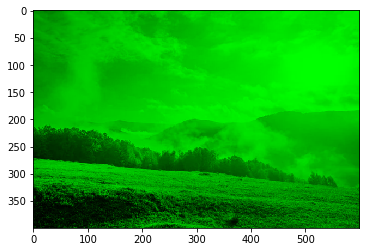

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_filter(image_path, color):
    img = cv2.imread(image_path)
    img_copy = np.copy(img)

    if color == 1:  
        img_copy[:, :, 1] = 0  
        img_copy[:, :, 2] = 0  
    elif color == 2:  
        img_copy[:, :, 0] = 0  
        img_copy[:, :, 2] = 0  
    elif color == 3:  
        img_copy[:, :, 0] = 0  
        img_copy[:, :, 1] = 0  
    elif color == 10:  
        img_copy[:, :, 0] = 0  
    elif color == 20:  
        img_copy[:, :, 2] = 0  
    elif color == 30:  
        img_copy[:, :, 1] = 0  
    else:
        print("El valor del color no es válido. Por favor, introduce un valor válido.")
        return None

    # Convertir la imagen de BGR a RGB
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen con matplotlib
    plt.imshow(img_copy)
    plt.show()
color_filter("../data/image_paisaje.jpg", 2)


### Problema 2
En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises, estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se construya la imagen original a color.

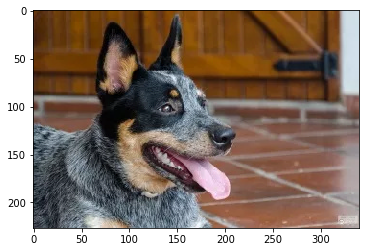

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def reconstruct_color_image(folder_path):
    if not folder_path.endswith('/'):
        folder_path += '/'
    filenames = os.listdir(folder_path)
    filenames.sort()

    img1 = cv2.imread(folder_path + filenames[0], cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(folder_path + filenames[2], cv2.IMREAD_GRAYSCALE)
    img3 = cv2.imread(folder_path + filenames[1], cv2.IMREAD_GRAYSCALE)

    color_image = cv2.merge((img1, img2, img3))
    color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
    plt.imshow(color_image)
    plt.show()

reconstruct_color_image("../data/imagen3/")

### Problema 3
Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

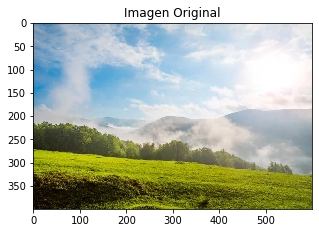

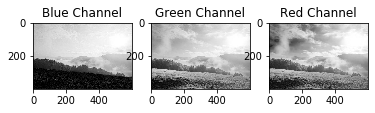

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def create_grayscale_images(image_path):
    img = cv2.imread(image_path)
    blue_channel, green_channel, red_channel = cv2.split(img)

    cv2.imwrite('blue_channel.png', blue_channel)
    cv2.imwrite('green_channel.png', green_channel)
    cv2.imwrite('red_channel.png', red_channel)

    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.show()

    plt.subplot(1, 3, 1)
    plt.imshow(blue_channel, cmap='gray')
    plt.title('Blue Channel')

    plt.subplot(1, 3, 2)
    plt.imshow(green_channel, cmap='gray')
    plt.title('Green Channel')

    plt.subplot(1, 3, 3)
    plt.imshow(red_channel, cmap='gray')
    plt.title('Red Channel')

    plt.show()

create_grayscale_images("../data/image_paisaje.jpg")

### Problema 4
Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media de la distribución.

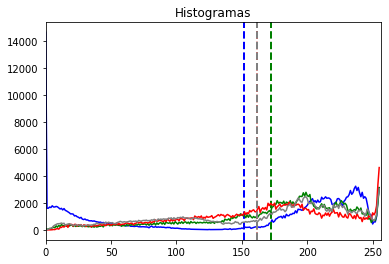

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_histograms(image_path):
    img = cv2.imread(image_path)

    blue_channel, green_channel, red_channel = cv2.split(img)
    grayscale = np.mean(img, axis=2).astype(np.uint8)

    colors = ('b', 'g', 'r', 'gray')
    for i, channel in enumerate([blue_channel, green_channel, red_channel, grayscale]):
        histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])
        mean = np.mean(channel)
        plt.plot(histogram, color=colors[i])
        plt.axvline(mean, color=colors[i], linestyle='dashed', linewidth=2)
        plt.xlim([0, 256])

    plt.title('Histogramas')
    plt.show()

show_histograms("../data/image_paisaje.jpg")


### Problema 5
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho especio

#### Espacio de color HSV

El espacio de color HSV (Hue, Saturation, Value) es un modelo de color alternativo al tradicional RGB (Red, Green, Blue). A diferencia del RGB, que se basa en los colores primarios de la luz, el HSV describe los colores de una manera que tiende a ser más intuitiva para los humanos.

##### Hue (Tono)

El tono es lo que normalmente pensamos como 'color'. En el modelo HSV, el tono se representa como un ángulo en un círculo de color.En un arco iris dispuesto en un círculo, empezando y terminando en rojo, con todos los demás colores entre medias. Eso es básicamente lo que el tono representa. Los valores típicos para el tono van de 0 a 360 grados, aunque en algunos sistemas puedes verlos representados como un número de 0 a 1 o de 0 a 100.

##### Saturation (Saturación)

La saturación es la 'pureza' del color. Un color altamente saturado es vibrante y rico, mientras que un color con baja saturación es más gris y apagado. Puedes pensar en la saturación como la cantidad de color 'puro' que se ha mezclado con el gris. La saturación se mide como un porcentaje del 0% al 100%, donde el 0% es completamente gris y el 100% es el color puro.

##### Value (Valor)

1. El valor, también conocido a veces como 'brillo', es la luminosidad del color. Un color con un valor bajo es oscuro, mientras que un color con un valor alto es brillante. Al igual que la saturación, el valor se mide como un porcentaje del 0% al 100%, donde el 0% es completamente oscuro (negro) y el 100% es completamente luminoso.

2. El espacio de color HSV es especialmente útil en aplicaciones que requieren un control intuitivo del color, como la selección de colores en un programa de edición de imágenes. También es útil en aplicaciones que requieren separar la intensidad de la luz de la información de color, como el seguimiento de objetos en la visión por computadora.

3. Para convertir colores del espacio RGB al HSV, puedes usar las fórmulas de conversión apropiadas. Sin embargo, muchas bibliotecas de procesamiento de imágenes, como OpenCV, proporcionan funciones para hacer esta conversión por ti.

4. El espacio de color HSV es un tema fascinante y hay mucho más que aprender sobre él. Si estás interesado en los colores y cómo los representamos y percibimos, definitivamente vale la pena investigar más sobre este tema.